# HOMEWORK NOTES

- __Do the assignment or don't.__ 

    - If you run into issues, ask questions. 
    - If you run into issues at the last minue, explain what the issue is in your homework. 


- __Read the instructions.__

    - For example, In this assignment the rules were to load *more than 10 variables, stored across multiple files*, and *Organize/munge the data into a single Pandas DataFrame*. Some of you did not do this. 


- __If you use a custom dataset, you MUST include it in your submission.__


- The more feedback you can give when editing code, the better off we all are. 







# It's a good idea to import things at the top of the file.

This isn't strictly necessary, but it will make your life better in the long run, as it will help you know what packages you need installed in order to run something. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import itertools 

%matplotlib inline


# Start by reading in files

In [2]:
series_file = 'bls/bls_series.csv'
records_file = 'bls/bls_records.csv'


In [5]:
series = pd.read_csv(series_file)
records = pd.read_csv(records_file, parse_dates=[2])



In [11]:
print( records.head() )
print( type( records['blsid'][0] ))

records.sort_values('period', inplace=True)
# functionally equal to: records = records.sort_values('period')

print( records.head() )

   series_id                 blsid     period      value  footnote
0          1  LAUST280000000000006 2008-03-01  1312045.0       NaN
1          1  LAUST280000000000006 2008-01-01  1313585.0       NaN
2          1  LAUST280000000000006 2008-02-01  1311059.0       NaN
3          1  LAUST280000000000006 2002-07-01  1294242.0       NaN
4          1  LAUST280000000000006 2007-12-01  1330529.0       NaN
<class 'str'>
        series_id                 blsid     period      value  footnote
242450       1333  SMU01000002000000001 2000-01-01      101.1       NaN
143064        787  SMS20000002000000001 2000-01-01       66.5       NaN
14014          78  LAUST240000000000006 2000-01-01  2763818.0       NaN
158215        870  SMS41000004000000001 2000-01-01      321.3       NaN
149426        822  SMU49000000000000001 2000-01-01     1044.9       NaN


In [12]:
print(series.head())

     id        blsid                                              title  \
0  1613  LNS12300000                        Employment-Population Ratio   
1  1615  LNS12600000                   Employed, Usually Work Part Time   
2  1616  LNU02036012  Employment Level, Nonag. Industries, With a Jo...   
3  1617  LNS14027689  Unemployment Rate - 25 Years & Over, Some Coll...   
4  1618  LNS13327709  Alternative measure of labor underutilization U-6   

  source is_primary  delta_id is_delta is_adjusted  
0    CPS          t    1686.0        f           f  
1    CPS          t    1688.0        f           f  
2    CPS          t    1689.0        f           f  
3    CPS          t    1690.0        f           f  
4    CPS          t    1691.0        f           f  


# Merge Files


This is where the magic happens.

In [18]:
df = records.merge(series, on='blsid', how='inner')

# df = records.merge(series, left_on='blsid', right_on='blsid')
# df = pd.merge( left=records, right=series, left_on='blsid', right_on='blsid')

In [23]:
df.sample(n=5)['title'].values


array(['Colorado, Professional and Business Services, Not seasonally adjusted - labor force',
       'Kansas, Professional and Business Services, Seasonally adjusted - labor force [percent change]',
       'Virgin Islands, Financial Activities, Not seasonally adjusted - labor force',
       'Alaska, Construction, Seasonally adjusted - labor force',
       'South Carolina, Education and Health Services, Seasonally adjusted - labor force'],
      dtype=object)

In [34]:
print( len( df['title'].str.contains('unemployment') ) )
print( len(  df['title'] ) )

df.loc[ df['title'].str.contains('unemployment'),'title' ].unique()

609207
609207


array(['Wisconsin, seasonally adjusted - unemployment rate',
       'Wyoming, not seasonally adjusted - unemployment',
       'Oregon, not seasonally adjusted - unemployment',
       'Kentucky, seasonally adjusted - unemployment',
       'Maryland, not seasonally adjusted - unemployment rate',
       'New Jersey, not seasonally adjusted - unemployment rate',
       'Rhode Island, not seasonally adjusted - unemployment rate',
       'Kansas, not seasonally adjusted - unemployment',
       'Delaware, seasonally adjusted - unemployment',
       'New Hampshire, not seasonally adjusted - unemployment rate',
       'Wisconsin, not seasonally adjusted - unemployment',
       'Maryland, not seasonally adjusted - unemployment',
       'Mississippi, seasonally adjusted - unemployment rate',
       'Arkansas, seasonally adjusted - unemployment',
       'Tennessee, seasonally adjusted - unemployment rate',
       'Oklahoma, not seasonally adjusted - unemployment rate',
       'Washington, seasonal

In [35]:

selected_columns = df['title'].str.contains('seasonally adjusted - unemployment$') & ~df['title'].str.contains('not seasonally')


print ( df.loc[ selected_columns, 'title'].sample(n=5))



234728      California, seasonally adjusted - unemployment
264367           Texas, seasonally adjusted - unemployment
84271         Illinois, seasonally adjusted - unemployment
191489    Pennsylvania, seasonally adjusted - unemployment
41160         Maryland, seasonally adjusted - unemployment
Name: title, dtype: object


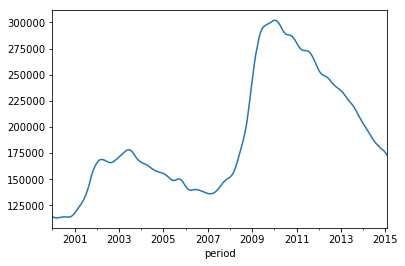

In [36]:
df.loc[selected_columns].groupby('period')['value'].mean().plot()



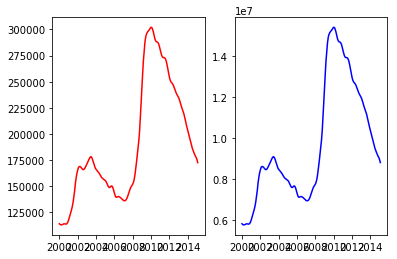

In [43]:
# using non-pandas plot function... 
f, axarr = plt.subplots(1,2)
axarr[0].plot( df.loc[selected_columns].groupby('period')['value'].mean(), 'r' )
axarr[1].plot( df.loc[selected_columns].groupby('period')['value'].sum(), 'b')


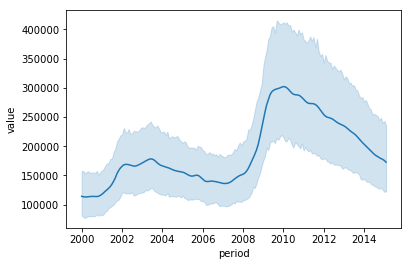

In [48]:
# using seaborn lineplot

sns.lineplot( x='period', y='value', data=df.loc[selected_columns])



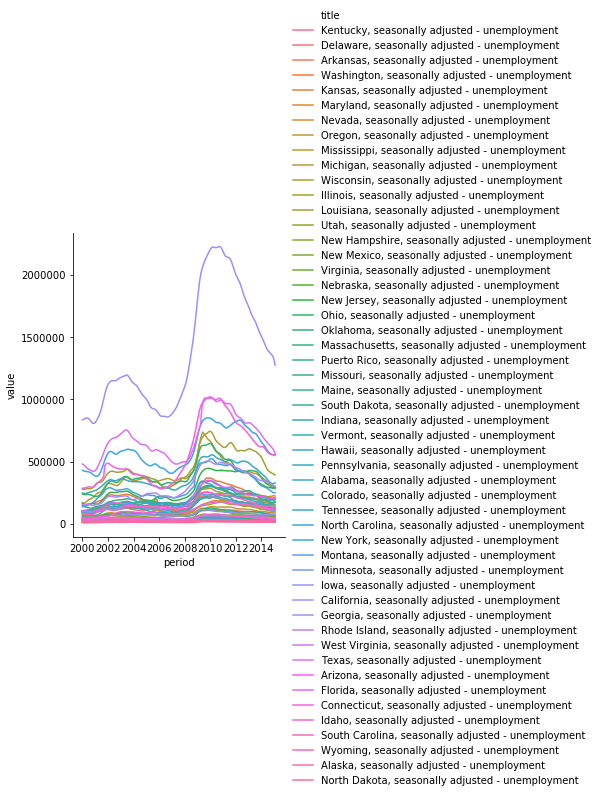

In [49]:
# using seaborn regplot
sns.relplot(x="period", y="value", hue="title", kind="line", legend="full", data=df.loc[selected_columns] )

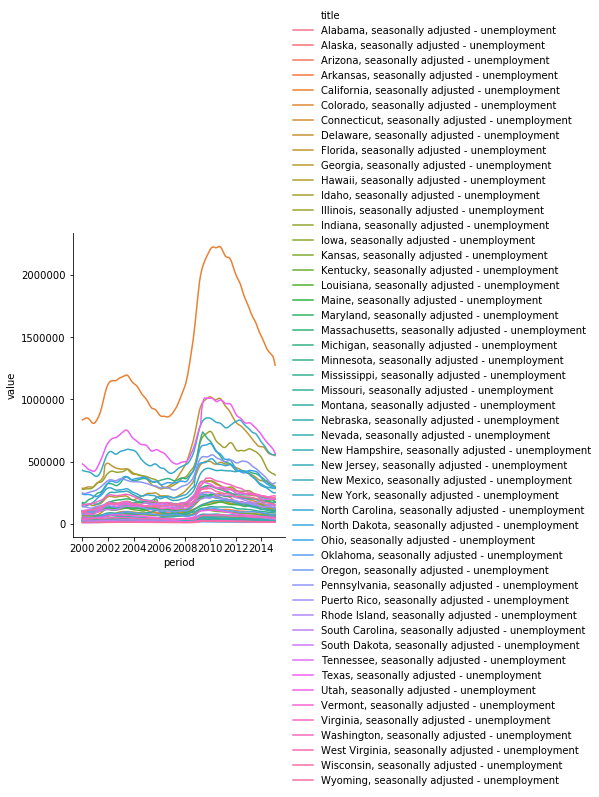

In [50]:
# regplot sorted by title... 
sns.relplot(x="period", y="value", hue="title", kind="line", legend="full", data=df.loc[selected_columns].sort_values('title') )

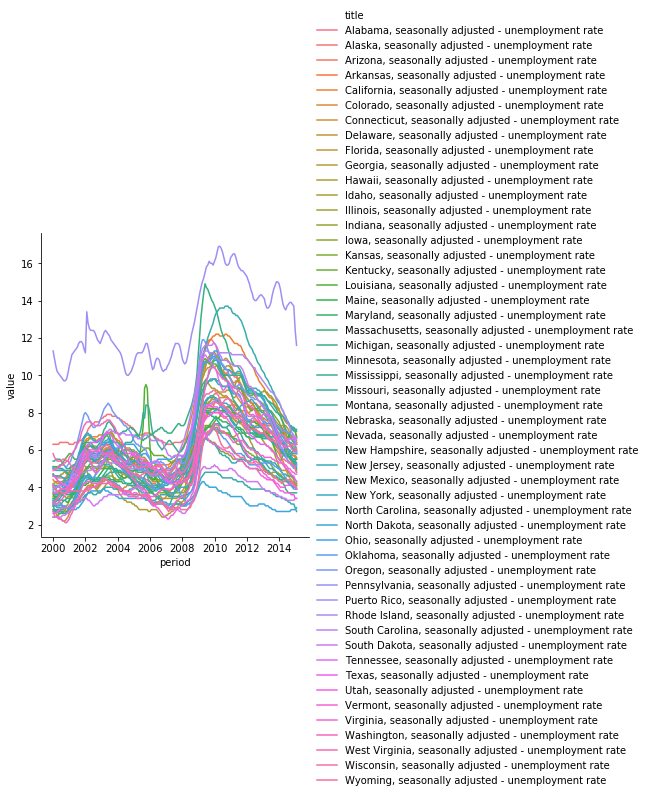

In [51]:
# select unenplotment *rate*
selected_columns_rate = df['title'].str.contains('seasonally adjusted - unemployment rate$') & ~df['title'].str.contains('not seasonally')
sns.relplot(x="period", y="value", hue="title", kind="line", legend="full", data=df.loc[selected_columns_rate].sort_values('title') )




In [64]:
# for s in df.loc[selected_columns_rate, 'title'].unique():
#     print( s )

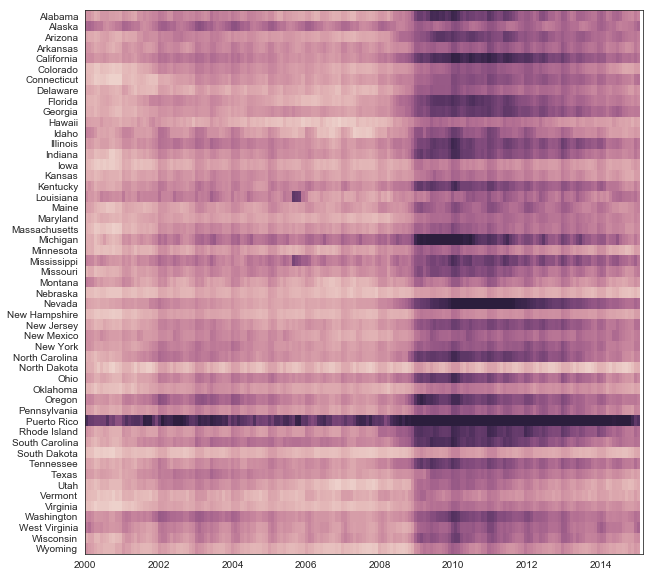

In [59]:
# in order to get matplotlib to deal with dates, correctly. 
import matplotlib.dates as mdates

sns.set_style('white')

# get a list of variables to use...
state_unemployment_vars = df.loc[ df['title'].str.contains(', not seasonally adjusted - unemployment rate$') ]
state_unemployment_vars = state_unemployment_vars.sort_values('title', ascending=False)

# get a list of bslids for the unenployment rate
state_unenployment_ids = state_unemployment_vars['blsid'].unique()

# create a pivoted dataframe of unemployment. 
unemployment_df = df.pivot(index='period', columns='blsid', values='value').copy()

# select a colormap
my_cmap = sns.cubehelix_palette(n_colors=10, as_cmap=True )

# here is where we use mdates to set the x axis.
xlim = mdates.date2num([min(unemployment_df.index), max(unemployment_df.index)])

# create figure
f,ax = plt.subplots(1,1,figsize=(10,10))

# # create axis. 
ax.imshow( unemployment_df[state_unenployment_ids].transpose(), 
          extent=[xlim[0], xlim[1], 0,len(state_unenployment_ids)], 
          aspect='auto', interpolation='none',
          origin='lower', cmap=my_cmap,
          vmin=2, vmax=13)

# set the x-axis to be a date.
ax.xaxis_date()

# get the list of titles
my_titles = state_unemployment_vars['title'].unique()

# turn the list of titles into a list of states.
my_states = [title.replace(', not seasonally adjusted - unemployment rate','') for title in my_titles]

# # make sure every row has a y-tick. 
ax.set_yticks([x+.5 for x in range(0,len(state_unenployment_ids))])

# # set the name of the y_ticks to states.
ax.set_yticklabels( my_states ) ;




In [ ]:
# custom legend
# x-ticks on big plot

